In [1]:
import astropy
import matplotlib.pyplot as plt
import numpy as np
import scipy
from astropy.io import fits
import glob
import re

In [2]:
def fname_to_img(fname):
    '''
    must be valid fname
    applies corrections to images before returning
    '''
    return fits.open(fname)[0].data

./jupiter/Autosave Image -0011g.fit
SIMPLE  =                    T                                                  BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     NAXIS   =                    2 /number of axes                                  NAXIS1  =                 2004 /fastest changing axis                           NAXIS2  =                 1336 /next to fastest changing axis                   BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           DATE-OBS= '2023-11-09T05:44:02.52' /YYYY-MM-DDThh:mm:ss observation, UT         EXPTIME =   1.0000000000000000 /Exposure time in seconds                        EXPOSURE=   1.0000000000000000 /Exposure time in seconds                        SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   CCD-TEMP=  -19.977100736655856 /CCD temperature at start of exposure in C       XPIX

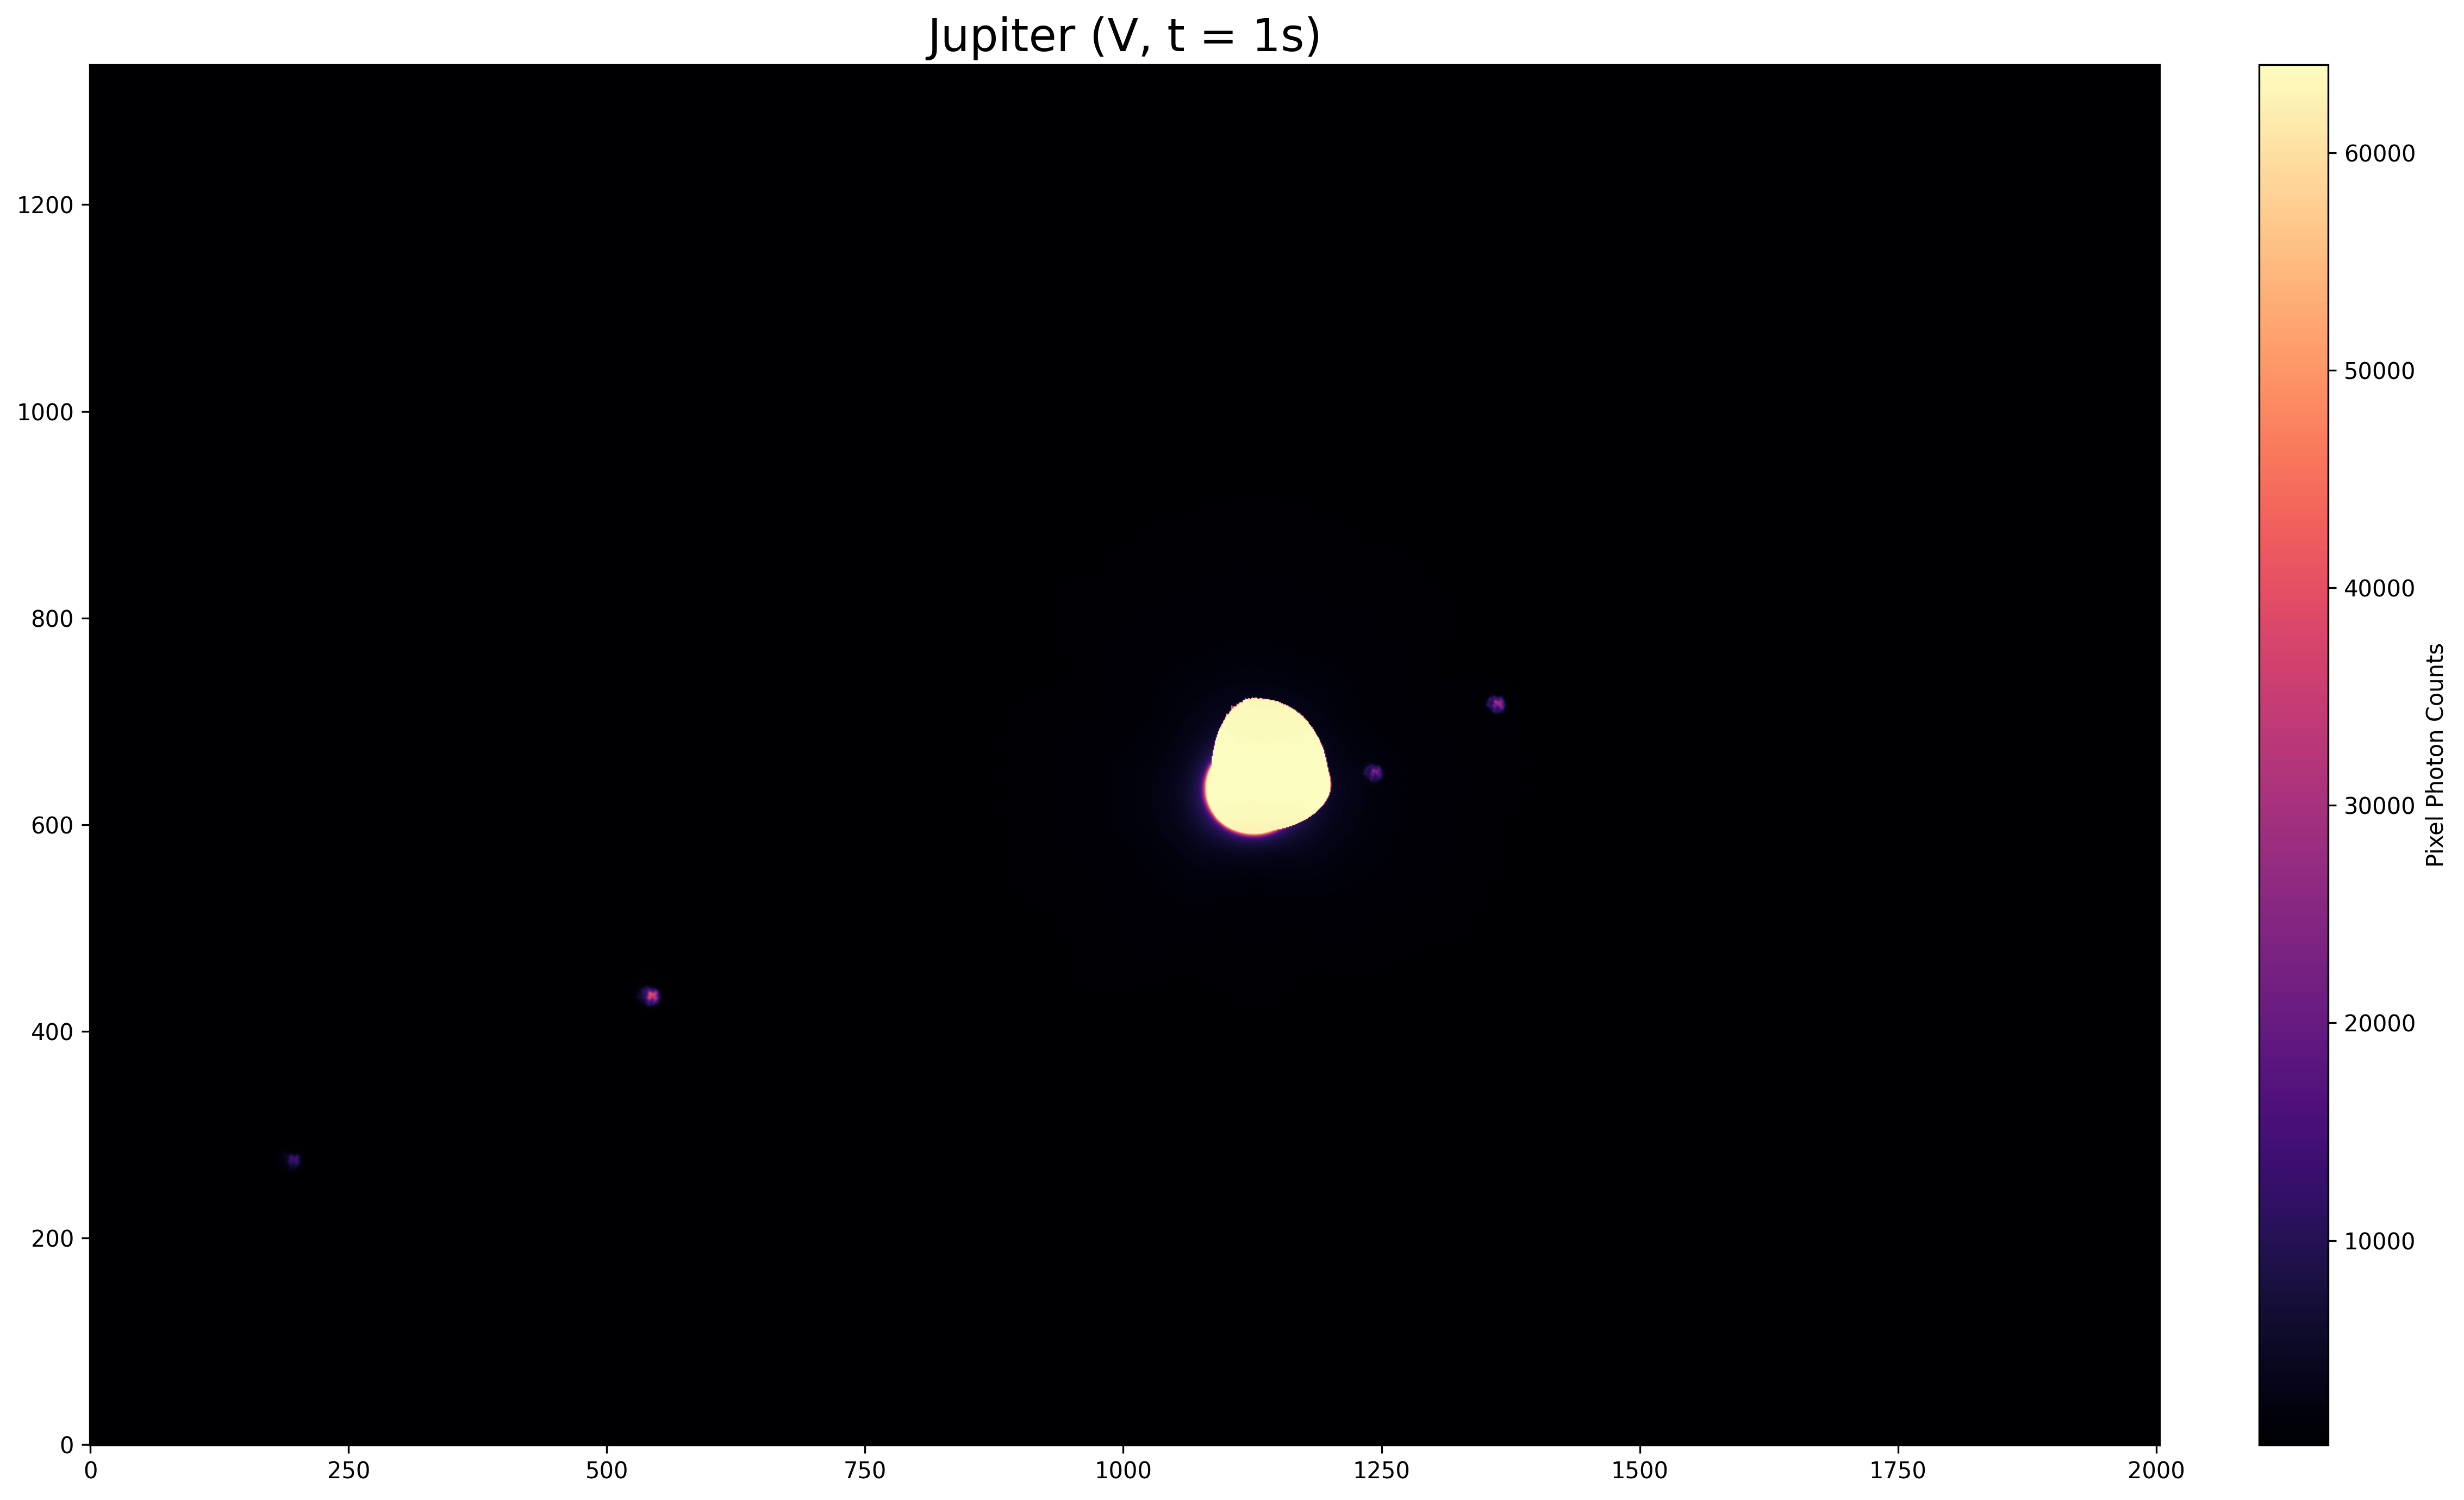

In [32]:
n = 30

img = image_list[n]
print(image_fnames[n])
print(fits.open(image_fnames[n])[0].header)

# get low/high rgb values
low  = np.percentile(img, 10) 
high = np.percentile(img, 99.9)

# plot image
plt.figure(figsize=[16,9], dpi=300)
im = plt.imshow(img, origin='lower', vmin=low,vmax=high, cmap='magma')
plt.colorbar(im, fraction=0.046, pad=0.04, label='Pixel Photon Counts')
plt.tight_layout()
plt.title('Jupiter (V, t = 1s)', fontsize=20)
plt.show()

(1336, 2004, 3)
[[[19 11 10]
  [19 11 10]
  [18 11 10]
  ...
  [16 10  9]
  [16 10  9]
  [16 10  9]]

 [[18 11 10]
  [19 11 10]
  [18 11 10]
  ...
  [16 10  9]
  [16 10  9]
  [17 10  9]]

 [[19 11 10]
  [18 11 10]
  [19 11 10]
  ...
  [17 10  9]
  [16 10  9]
  [16 10  9]]

 ...

 [[20 13 11]
  [20 12 12]
  [20 13 11]
  ...
  [19 11 10]
  [19 11 10]
  [18 11 10]]

 [[21 13 11]
  [21 13 11]
  [20 13 12]
  ...
  [19 11 10]
  [18 12 10]
  [18 11 10]]

 [[21 13 11]
  [20 12 12]
  [21 13 12]
  ...
  [19 11 10]
  [18 11 10]
  [18 11 10]]]


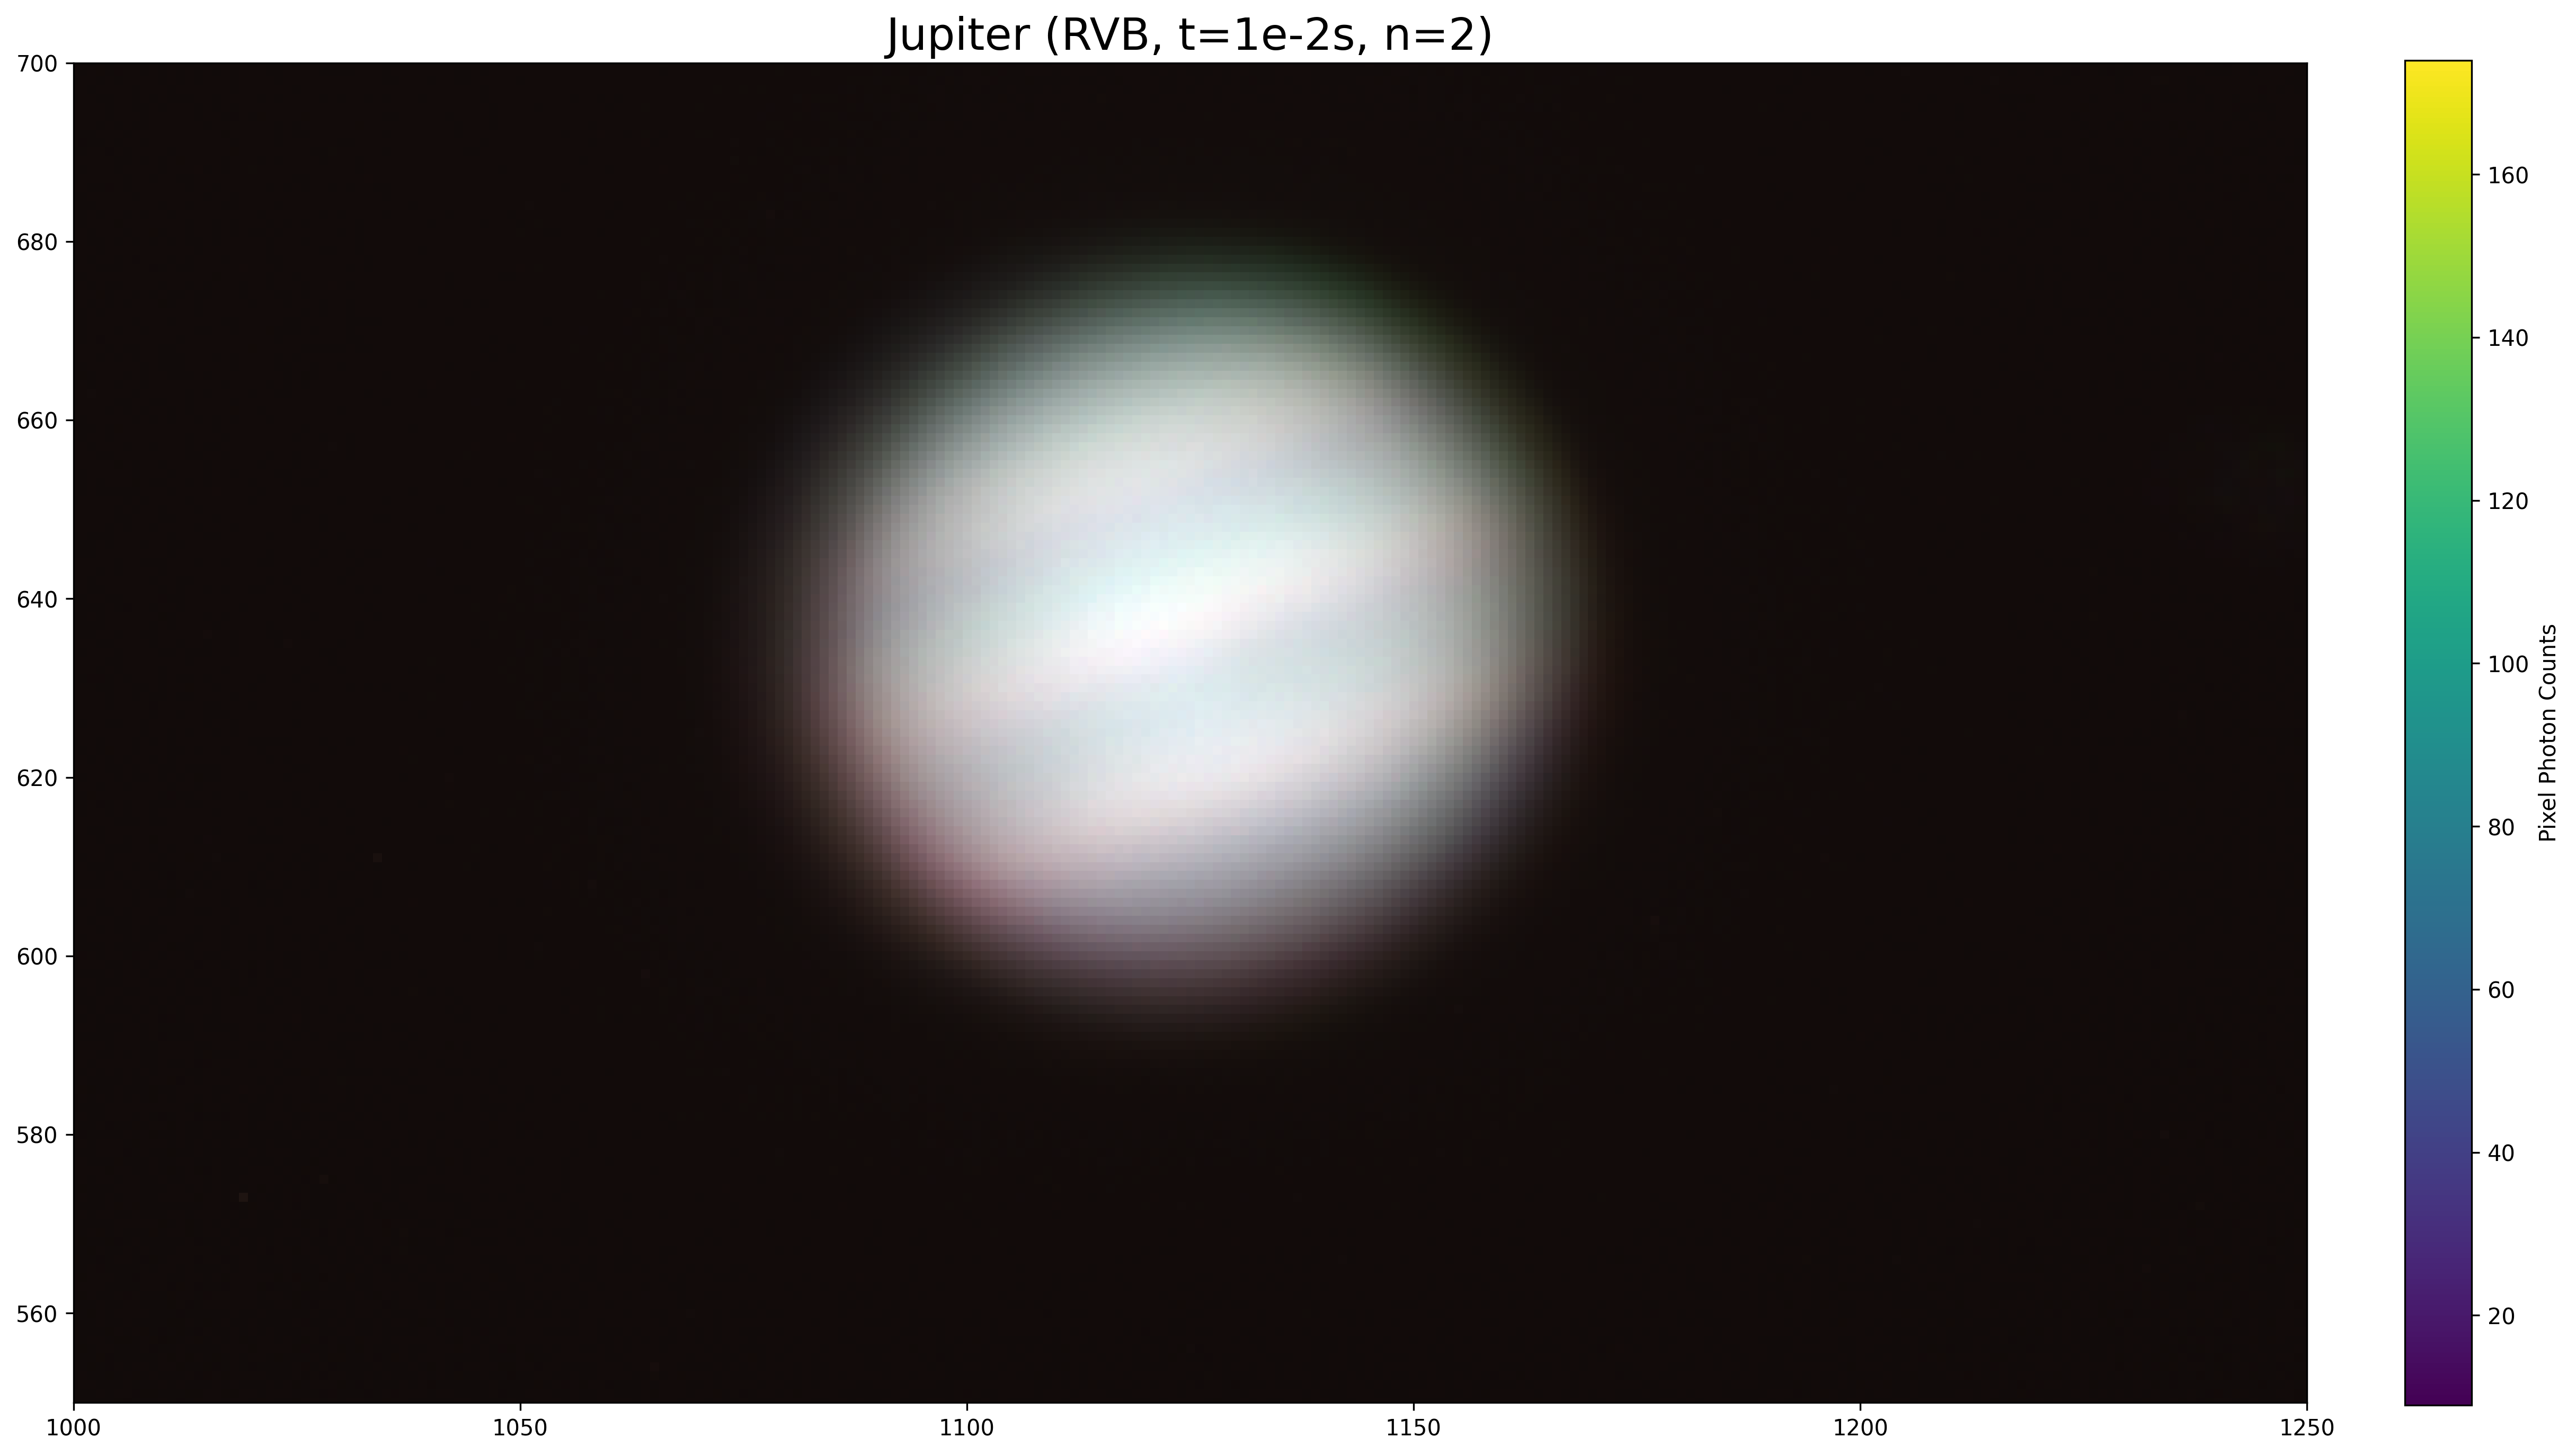

In [22]:
n = 2

result = []
for c in ['red', 'green', 'blue']:
    files = np.sort(glob.glob('./jupiter/.01s/{}/*.fit'.format(c)))
    result.append(np.mean(np.array([fname_to_img(f) for f in files[:n]]), axis=0))
result = np.array(result)

p = np.dstack(result)
print(p.shape)
p = p/np.max(p, axis=(0,1))
p *= 255
p = p.astype(np.uint8)
print(p)


img = p

# get low/high rgb values
low  = np.percentile(img, 10) 
high = np.percentile(img, 99.9)

# plot image
plt.figure(figsize=[16,9], dpi=300)
im = plt.imshow(img, origin='lower', vmin=low,vmax=high, interpolation='nearest')
plt.colorbar(im, fraction=0.046, pad=0.04, label='Pixel Photon Counts')
plt.tight_layout()
plt.title('Jupiter (RVB, t=1e-2s, n={})'.format(n), fontsize=20)
plt.ylim(550,700)
plt.xlim(1000, 1250)
plt.show()



(1336, 2004, 3)
[[[19 11 10]
  [18 11 10]
  [18 11 10]
  ...
  [16 10  9]
  [16 10  9]
  [16 10  9]]

 [[19 11 10]
  [19 11 10]
  [18 11 10]
  ...
  [16 10  9]
  [16 10  9]
  [16 10  9]]

 [[18 11 10]
  [18 11 10]
  [19 11 10]
  ...
  [16 10  9]
  [16 10  9]
  [16 10  9]]

 ...

 [[21 12 11]
  [21 12 11]
  [21 12 11]
  ...
  [19 11 10]
  [19 11 10]
  [18 11 10]]

 [[21 12 11]
  [20 12 11]
  [21 12 11]
  ...
  [18 11 10]
  [18 11 10]
  [18 11 10]]

 [[21 13 11]
  [21 12 11]
  [21 12 11]
  ...
  [18 11 10]
  [18 11 10]
  [18 11 10]]]


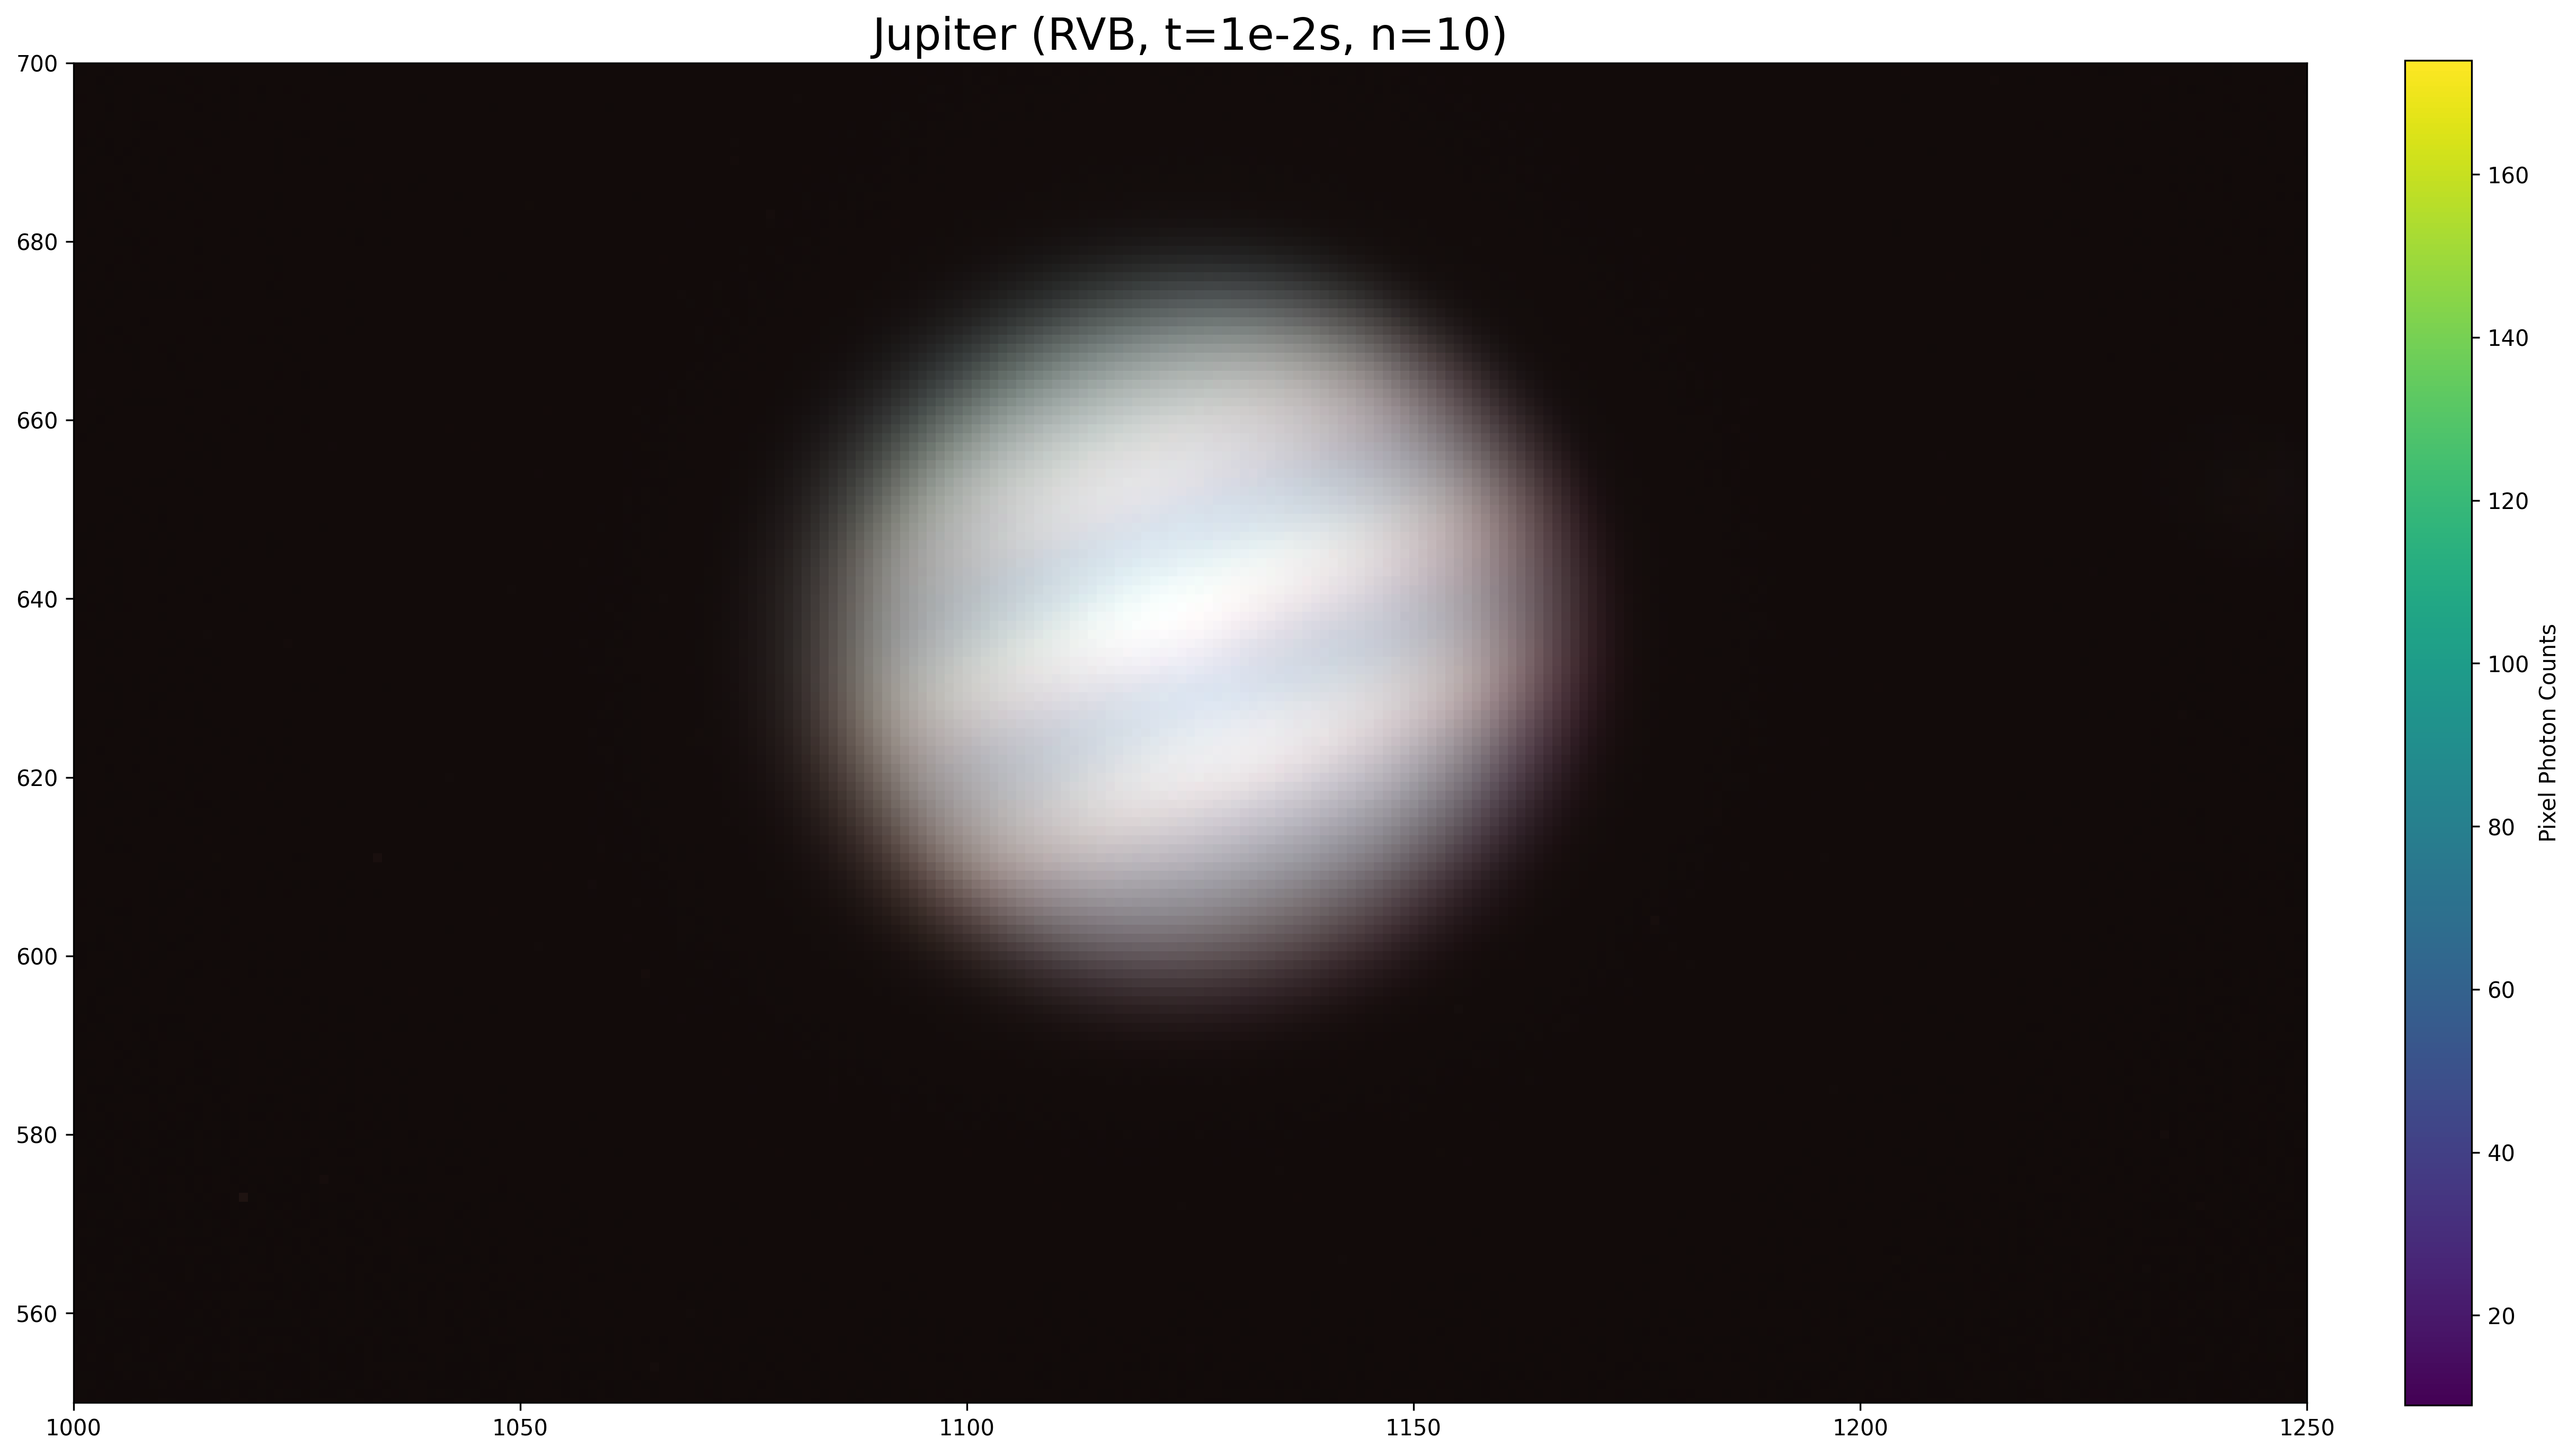

In [23]:
result = []
for c in ['red', 'green', 'blue']:
    files = np.sort(glob.glob('./jupiter/.01s/{}/*.fit'.format(c)))
    result.append(np.mean(np.array([fname_to_img(f) for f in files[:]]), axis=0))
result = np.array(result)

p = np.dstack(result)
print(p.shape)
p = p/np.max(p, axis=(0,1))
p *= 255
p = p.astype(np.uint8)
print(p)


img = p

# get low/high rgb values
low  = np.percentile(img, 10) 
high = np.percentile(img, 99.9)

# plot image
plt.figure(figsize=[16,9], dpi=300)
im = plt.imshow(img, origin='lower', vmin=low,vmax=high, interpolation='nearest')
plt.colorbar(im, fraction=0.046, pad=0.04, label='Pixel Photon Counts')
plt.tight_layout()
plt.title('Jupiter (RVB, t=1e-2s, n=10)', fontsize=20)
plt.ylim(550,700)
plt.xlim(1000, 1250)
plt.show()

